In [1]:
import numpy as np
import pandas as pd

In [2]:
N = 2000 # we'll create N samples

credits = 30 + 30 * np.random.random_sample((N)) # draw N samples from uniform distribution from range [0, 1) 
exerp = 35 + 70 * np.random.random_sample((N))
examp = 51 + exerp / 100 * 20 + 30 * np.random.random_sample((N)) # exam points depend on exercise points
reflp = 15 + 16 * np.random.random_sample((N))
presp = 33 * np.random.random_sample((N))

x = np.array([credits, examp, exerp, reflp, presp]) # create a numpy array where rows are credits, examp, etc
print(x.shape) # shape gives the dimensions of the array
print(x[0:5, 0:5]) # element in numpy array x can be accessed with x[4,5], slices (0:5, :5, 5:) can be used, too!

# but we want the data to be arranged into N rows, each having 5 columns
x = x.T # .T is transpose operation: an element e[i,j] becomes e[j,i]
print(x.shape)
print(x[0:10, 0:5])

(5, 2000)
[[ 50.72538049  43.3526239   51.12214132  30.15949192  38.8953907 ]
 [ 83.76115011  75.61048353  74.61547213  75.75128513  86.68538858]
 [ 93.19973735  36.85356038  59.6576047  103.08395674  59.45568468]
 [ 27.48436088  25.94538199  27.92370164  25.0996903   24.53872432]
 [  9.73036476  26.01932756   0.97280329  21.89762271   9.45939459]]
(2000, 5)
[[ 50.72538049  83.76115011  93.19973735  27.48436088   9.73036476]
 [ 43.3526239   75.61048353  36.85356038  25.94538199  26.01932756]
 [ 51.12214132  74.61547213  59.6576047   27.92370164   0.97280329]
 [ 30.15949192  75.75128513 103.08395674  25.0996903   21.89762271]
 [ 38.8953907   86.68538858  59.45568468  24.53872432   9.45939459]
 [ 53.94742006  72.1094049   60.81171328  22.56857877  31.42155796]
 [ 47.05445741  83.90902441  67.16320649  19.09257109  15.16680205]
 [ 34.34559943  94.74337863  95.96780123  24.06896835   3.14512276]
 [ 34.34865153  88.424014    91.57096962  19.18676893  14.46186376]
 [ 58.71114812  63.91622924

In [3]:
y = np.empty((N,)) # create an empty array of dimension N
y = x[:,1]/100*0.65 + x[:,2]/100*0.25 + x[:,3]/30*0.1 - 0.5 # : is a slice containing everything in that dimension

# element-wise multiplication, here (y > 0) is an array with same dimensions a y, 
# containing true for positions where the condition is true, false otherwise
# in multiplication true is interpreted as 1, false as 0 -> zero out anything that is not positive
y = np.rint(y * 10) * (y > 0) 

# typical statistical functions work, one could also use ranges to restric the elements over which operation is done
print(np.max(y))
print(np.min(y))
print(np.mean(y))

5.0
0.0
2.7385


In [4]:
import pandas as pd
    
dataset = np.column_stack((x, y)) # see numpy column_stack documentation
df = pd.DataFrame(dataset) # we create pandas data frame from a numpy array
df[:] = df[:].astype(int) # force it to be ints

# write to a csv file
df.to_csv('grading.csv', header=['credits', 'exams', 'exercises', 'reflections', 'presence', 'grade'], index=False)

In [5]:
df_gradingdata = pd.read_csv('grading.csv') # pandas read_csv for options on reading

In [6]:
alldata = df_gradingdata.values # .values gives out a numpy array from pandas dataframe

# split into training and test sets
# step 1: shuffle data to ensure we pick training and test sets in random fashion
np.random.shuffle(alldata)

TEST_N = round(alldata.shape[0] * 0.3) # .shape[0] gives the dimension on axis 0, here number of samples

X_train = alldata[0:alldata.shape[0] - TEST_N, 0:5]
Y_train = alldata[0:alldata.shape[0] - TEST_N, 5]

X_test = alldata[alldata.shape[0] - TEST_N:, 0:5]
Y_test = alldata[alldata.shape[0] - TEST_N:, 5]

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1400, 5)
(1400,)
(600, 5)
(600,)


[0 1 2 3 4 5]
[  7 149 407 499 304  34]


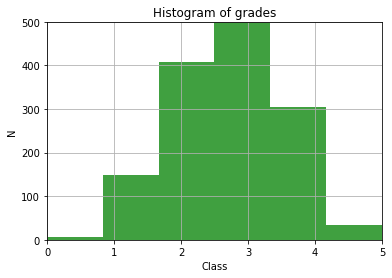

In [10]:
from matplotlib import pyplot as plt

# Compute label counts
classes, counts = np.unique(Y_train.reshape((-1,)), return_counts=True)
fs = np.asarray((classes, counts)).T

print(classes)
print(counts)

# see https://matplotlib.org/gallery/pyplots/pyplot_text.html#sphx-glr-gallery-pyplots-pyplot-text-py
# and https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist
n, bins, patches = plt.hist(Y_train, classes.shape[0], facecolor='g', alpha=0.75, align='mid')
plt.xlabel('Class')
plt.ylabel('N')
plt.title('Histogram of grades')
plt.axis([np.min(classes), np.max(classes), 0, np.max(counts)])
plt.grid(True)
    
plt.show()

In [8]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, Y_train)

# Make predictions using the test set
y_pred = np.around(regr.predict(X_test))

# The coefficients and intercept term
# Coefficients give the multipliers for each of the input features,
# intercept is the constant added to the result
# In one-dimensional linear regression y = a * x + b, a is coefficient and b the intercept term
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, y_pred))

Coefficients: 
 [0.00101297 0.06470287 0.02570888 0.03359731 0.00136529]
Intercept: 
 -5.040113611106889
Mean squared error: 0.02
Variance score: 0.98


In [9]:
# Sanity check for one sample
# dot product is sum of each coefficient multiplied with corresponding input feature
# intercept term is added to that to get the prrediction
print(np.dot(X_train[94], regr.coef_) + regr.intercept_)
# the result seems to the same as what .predict() returns, good!
print(regr.predict(X_train[94].reshape(1, -1)))
# and (at least in this case, sample # 94) the result is the same as expected result
print(Y_train[94])

3.185944576786813
[3.18594458]
3
